# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [2]:
# Initial imports
import os
import pandas as pd

from dotenv import load_dotenv

import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/philippegiang/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [9]:
# Read your api key environment variable
api_key = os.getenv("news_api")



In [10]:
# Create a newsapi client
from newsapi import NewsApiClient


newsapi = NewsApiClient(api_key='bac870a0f45a4e9085a89203c0a045e1')



In [11]:
# Fetch the Bitcoin news articles
btc_articles = newsapi.get_everything(q='bitcoin',
                                      language='en',
                                      sort_by='relevancy')
btc_articles['totalResults']

6190

In [12]:
# Fetch the Ethereum news articles
eth_articles = newsapi.get_everything(q='ethereum',
                                      language='en',
                                      sort_by='relevancy')
eth_articles['totalResults']

2769

In [13]:
# Create the Bitcoin sentiment scores DataFrame
def get_sentiment_score(article, based_on):
    sentiments = []

    for article in article["articles"]:
        try:
            text = article[based_on]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
            sentiments.append({
                "Compound": compound,
                "Negative": neg,
                "Neutral": neu,
                "Positive": pos,
                based_on : text
            })

        except AttributeError:
            pass

    # Create DataFrame
    df = pd.DataFrame(sentiments)
    return df

btc_sentiment_df = get_sentiment_score(btc_articles, 'content')
btc_sentiment_df

,Compound,Negative,Neutral,Positive,content
0,0.3612,0.000,0.923,0.077,Musk.MARK RALSTON/AFP via Getty Images\r\nElon...
1,0.0000,0.000,1.000,0.000,When Denis Rusinovich set up cryptocurrency mi...
2,-0.4404,0.083,0.917,0.000,Were officially building an open Bitcoin minin...
3,-0.4404,0.083,0.917,0.000,Block founder Jack Dorsey has announced on Twi...
4,0.3818,0.000,0.927,0.073,Tesla Inc (TSLA.O) will accept the meme-based ...
5,0.6369,0.000,0.852,0.148,A cryptocurrency CEO has become one of the ric...
6,-0.4404,0.088,0.912,0.000,Jack Dorsey onstage at a bitcoin convention in...
7,0.5859,0.000,0.858,0.142,Dec 23 (Reuters) - The U.S. Securities and Exc...
8,-0.3716,0.074,0.926,0.000,Between Bitcoin-themed superspreader events an...
9,0.0000,0.000,1.000,0.000,A representation of the virtual cryptocurrency...


In [14]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiment_df = get_sentiment_score(eth_articles, 'content')
eth_sentiment_df

,Compound,Negative,Neutral,Positive,content
0,-0.1531,0.060,0.940,0.000,"Crypto Street Restaurant, Clearwater Beach, Fl..."
1,0.7579,0.000,0.783,0.217,Investors interest and growing cryptocurrency ...
2,0.0000,0.000,1.000,0.000,CryptoPunksRokas Tenys\r\n<ul><li>NFT sales ha...
3,0.4215,0.000,0.894,0.106,"TO BELIEVERS, OPEN, public blockchains provide..."
4,0.0000,0.000,1.000,0.000,"Representations of cryptocurrencies Bitcoin, E..."
5,0.0000,0.000,1.000,0.000,"In early December 2021, Skiff rolled out the o..."
6,0.0000,0.000,1.000,0.000,"In the future, luxury brands may have storefro..."
7,0.0000,0.000,1.000,0.000,"Representations of cryptocurrencies Bitcoin, E..."
8,0.0000,0.000,1.000,0.000,A representation of the virtual cryptocurrency...
9,0.6369,0.000,0.852,0.148,A cryptocurrency CEO has become one of the ric...


In [16]:
# Describe the Bitcoin Sentiment
btc_sentiment_df.describe()


,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.00000
mean,0.033020,0.033950,0.920150,0.04590
std,0.395554,0.046556,0.074058,0.06563
min,-0.556300,0.000000,0.781000,0.00000
25%,-0.374150,0.000000,0.861750,0.00000
50%,0.000000,0.000000,0.923000,0.00000
75%,0.366350,0.074750,1.000000,0.07625
max,0.790600,0.156000,1.000000,0.21100


In [17]:
# Describe the Ethereum Sentiment
eth_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.00000,20.000000,20.000000
mean,0.259955,0.01115,0.910700,0.078150
std,0.363799,0.02832,0.081459,0.084735
min,-0.434000,0.00000,0.751000,0.000000
25%,0.000000,0.00000,0.860250,0.000000
50%,0.177700,0.00000,0.909000,0.078000
75%,0.554250,0.00000,1.000000,0.136000
max,0.905200,0.10200,1.000000,0.249000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum at 0.078150

Q: Which coin had the highest compound score?

A: Ethereum at 0.905200

Q. Which coin had the highest positive score?

A: Ethereum at 0.249000

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [46]:
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('stopwords')
nltk.download('punkt')

nltk.download('wordnet')


from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/philippegiang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/philippegiang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/philippegiang/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [22]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
stop_words = set(stopwords.words('english'))



In [43]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z0-9 ]")
    re_clean = regex.sub('', text)
    
    # Create a list of the words
    words = word_tokenize(re_clean.lower())
    
    # Convert the words to lowercase and Remove the stop words
    words = [word for word in words if word not in stop_words]
    
    # Lemmatize Words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]
    
    return tokens

In [47]:
# Create a new tokens column for Bitcoin

btc_sentiment_df['tokens'] = btc_sentiment_df['content'].apply(tokenizer)
btc_sentiment_df.head()

,Compound,Negative,Neutral,Positive,content,tokens
0,0.3612,0.000,0.923,0.077,Musk.MARK RALSTON/AFP via Getty Images\r\nElon...,"[muskmark, ralstonafp, via, getty, imageselon,..."
1,0.0000,0.000,1.000,0.000,When Denis Rusinovich set up cryptocurrency mi...,"[denis, rusinovich, set, cryptocurrency, minin..."
2,-0.4404,0.083,0.917,0.000,Were officially building an open Bitcoin minin...,"[officially, building, open, bitcoin, mining, ..."
3,-0.4404,0.083,0.917,0.000,Block founder Jack Dorsey has announced on Twi...,"[block, founder, jack, dorsey, announced, twit..."
4,0.3818,0.000,0.927,0.073,Tesla Inc (TSLA.O) will accept the meme-based ...,"[tesla, inc, tslao, accept, memebased, cryptoc..."


In [48]:
# Create a new tokens column for Ethereum
eth_sentiment_df['tokens'] = eth_sentiment_df['content'].apply(tokenizer)
eth_sentiment_df.head()

,Compound,Negative,Neutral,Positive,content,tokens
0,-0.1531,0.06,0.940,0.000,"Crypto Street Restaurant, Clearwater Beach, Fl...","[crypto, street, restaurant, clearwater, beach..."
1,0.7579,0.00,0.783,0.217,Investors interest and growing cryptocurrency ...,"[investor, interest, growing, cryptocurrency, ..."
2,0.0000,0.00,1.000,0.000,CryptoPunksRokas Tenys\r\n<ul><li>NFT sales ha...,"[cryptopunksrokas, tenysullinft, sale, breakth..."
3,0.4215,0.00,0.894,0.106,"TO BELIEVERS, OPEN, public blockchains provide...","[believer, open, public, blockchains, provide,..."
4,0.0000,0.00,1.000,0.000,"Representations of cryptocurrencies Bitcoin, E...","[representation, cryptocurrencies, bitcoin, et..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [49]:
from collections import Counter
from nltk import ngrams

In [50]:
# Generate the Bitcoin N-grams where N=2
def get_tokens(df):
    tokens = []
    for token in df['tokens']:
        tokens.extend(token)
    return tokens


btc_tokens = get_tokens(btc_sentiment_df)
eth_tokens = get_tokens(eth_sentiment_df)

In [17]:
# Generate the Ethereum N-grams where N=2
def bigram_counter(tokens, N=2): 
    words_count = dict(Counter(ngrams(tokens, n=N)))
    return words_count|

In [51]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [52]:
# Use token_count to get the top 10 words for Bitcoin
top_10_token_btc = token_count(btc_tokens)
top_10_token_btc

[('char', 20),
 ('bitcoin', 17),
 ('cryptocurrency', 10),
 ('mining', 5),
 ('payment', 5),
 ('reuters', 5),
 ('digital', 4),
 ('building', 4),
 ('open', 4),
 ('currency', 3)]

In [53]:
# Use token_count to get the top 10 words for Ethereum
top_10_token_eth = token_count(eth_tokens)
top_10_token_eth

[('char', 19),
 ('ethereum', 8),
 ('2021', 6),
 ('year', 5),
 ('cryptocurrencies', 5),
 ('bitcoin', 5),
 ('new', 4),
 ('cryptocurrency', 4),
 ('user', 4),
 ('crypto', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [55]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

Text(0.5, 1.0, 'Bitcoin Word Cloud')

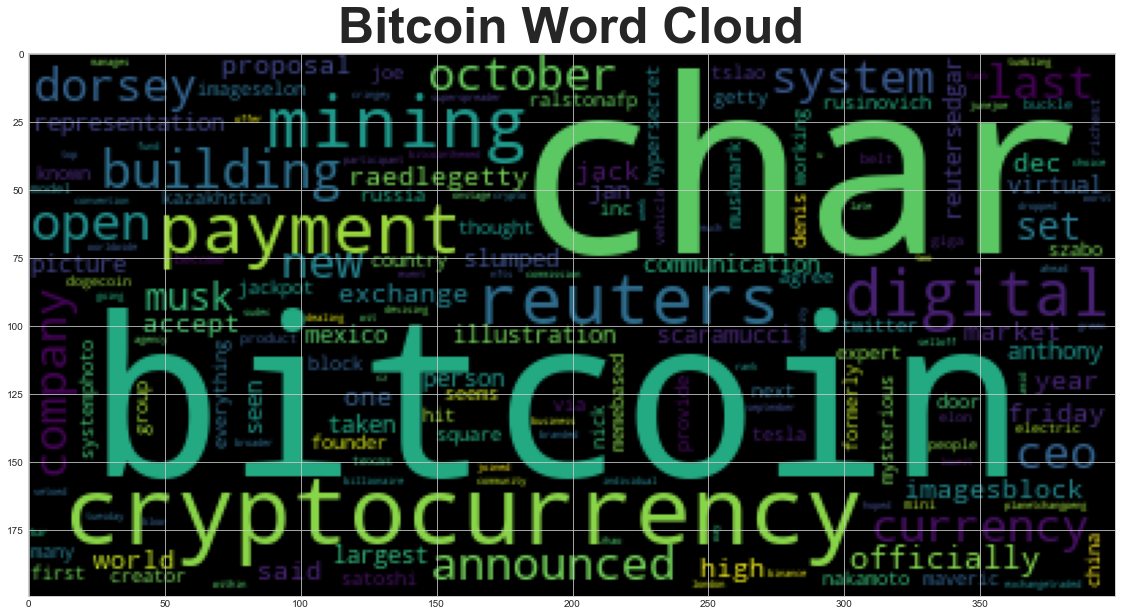

In [56]:
# Generate the Bitcoin word cloud
wc = WordCloud(collocations=False).generate(' '.join(btc_tokens))
plt.imshow(wc)
plt.title(label='Bitcoin Word Cloud', fontdict={'fontsize': 50, 'fontweight':'bold'})

Text(0.5, 1.0, 'Ethereum Word Cloud')

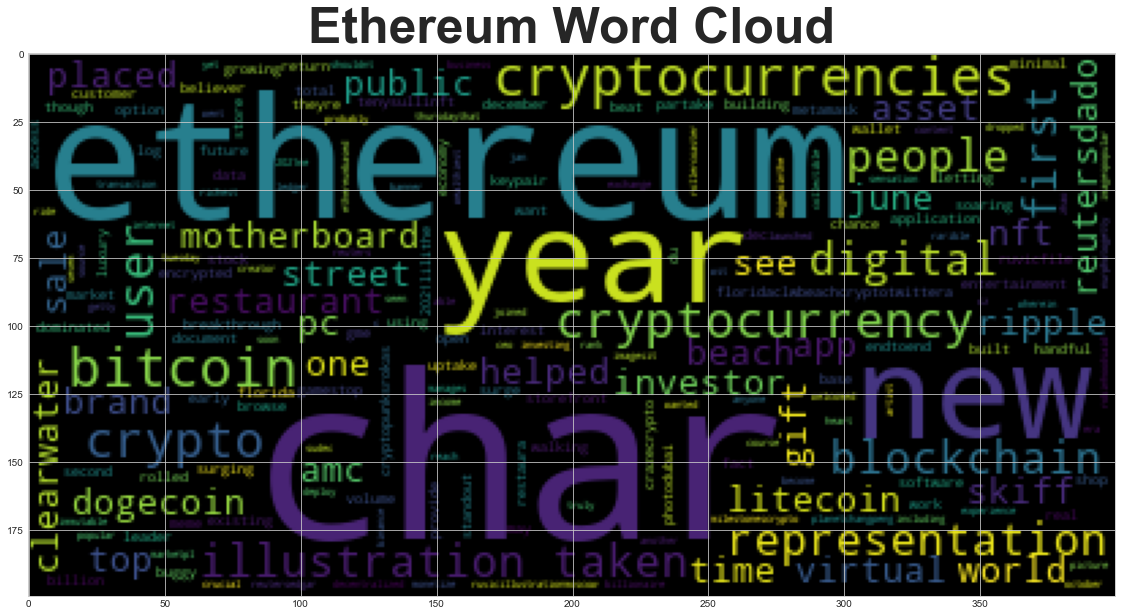

In [57]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(' '.join(eth_tokens))
plt.imshow(wc)
plt.title(label='Ethereum Word Cloud', fontdict={'fontsize': 50, 'fontweight':'bold'})

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [59]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [68]:
# Load the spaCy model

!python -m spacy download en_core_web_lg 
!python -m spacy download en

import en_core_web_sm

nlp = en_core_web_sm.load()

     |████████████████████████████████| 777.4 MB 9.6 kB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     |████████████████████████████████| 13.9 MB 2.2 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


---
### Bitcoin NER

In [69]:
# Concatenate all of the Bitcoin text together
btc_content = ' '.join(btc_sentiment_df['content'])

In [70]:
# Run the NER processor on all of the text
doc= nlp(btc_content)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [71]:
# Render the visualization
displacy.render(doc, style='ent')

In [72]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

Getty Images ORG
Elon Musk PERSON
Nick Szabo PERSON
Satoshi Nakamoto PERSON
Denis Rusinovich PERSON
Maveric Group ORG
Kazakhstan GPE
2017 DATE
China GPE
Russia GPE
Bitcoin PERSON
Joe Raedle/Getty Images PERSON
Square FAC
Bitcoin PERSON
Jack Dorsey PERSON
Twitter PRODUCT
first ORDINAL
October last year DATE
the "Giga Texas ORG
Elon Musk PERSON
Friday DATE
Changpeng PERSON
Binance PERSON
Jack Dorsey PERSON
June DATE
Joe Raedle/Getty Images PERSON
Dec 23 DATE
Reuters ORG
The U.S. Securities and Exchange Commission ORG
two CARDINAL
this week DATE
Bitcoin PERSON
October 19, 2021 DATE
REUTERS ORG
Reuters ORG
6.13% PERCENT
47,606.92 MONEY
Tuesday DATE
LONDON GPE
Jan 7 DATE
Reuters ORG
Friday DATE
as much as 5% PERCENT
late September DATE
41,000 MONEY
3.7% PERCENT
one CARDINAL
Bitcoin PERSON
October 19, 2021 DATE
REUTERS ORG
Jan 10 DATE
Reuters ORG
over 5% PERCENT
Monday DATE
40,000 MONEY
5-month DATE
2.6% PERCENT
40,800 MONEY
the spring of 2021 DATE
Signal ORG
UK GPE
Trump White House ORG
Ant

---

### Ethereum NER

In [73]:
# Concatenate all of the Ethereum text together
eth_content = ' '.join(eth_sentiment_df['content'])

In [74]:
# Run the NER processor on all of the text
doc= nlp(eth_content)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

In [75]:
# Render the visualization
displacy.render(doc, style='ent')

In [76]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

Crypto Street Restaurant ORG
Clearwater Beach GPE
Florida.@ClwBeachCrypto/Twitter ORG
Clearwater Beach GPE
Florida GPE
Crypto Street Restaura PERSON
Ethereum GPE
418% PERCENT
2021 DATE
AMC Entertainment ORG
AMC ORG
GME ORG
Ethereums ORG
more than 650% PERCENT
CryptoPunksRokas Tenys ORG
a breakthrough year DATE
$14 billion MONEY
2021.</li><li CARDINAL
NFT ORG
OPEN ORG
second ORDINAL
Bitcoin, Ethereum ORG
DogeCoin ORG
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/File Photo PERSON
DUBAI ORG
early December 2021 DATE
Skiff ORG
MetaMask PRODUCT
Skiff ORG
Bitcoin, Ethereum ORG
DogeCoin ORG
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/Illustration PERSON
MOSCOW GPE
Jan DATE
Bitcoin PERSON
October 19, 2021 DATE
REUTERS ORG
Reuters ORG
6.13% PERCENT
47,606.92 MONEY
Tuesday DATE
Changpeng PERSON
Binance PERSON
Getty Images ORG
a banner year DATE
2021 DATE
the new year DATE
Crypto PERSON
2021 DATE
NurPhoto/Getty Images ORG
Robinhood ORG
Thursday DATE
seven CARDINAL
Ethereum ORG
NFT ORG
32 CARDINAL
26 CA

---